In [35]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
from scipy import integrate
import numbers

In [5]:
def model(x):
    return x * np.exp(-x)

In [9]:
x = np.linspace(0, 10, 100)

In [10]:
y = model(x)

In [18]:
dy = nd.Derivative(model)
d2y = nd.Derivative(model, n=2)

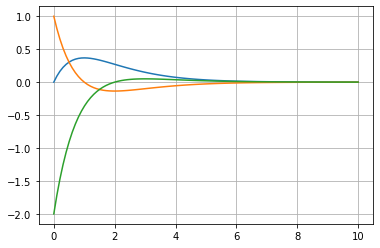

In [20]:
fig, axe = plt.subplots()
axe.plot(x, y)
axe.plot(x, dy(x))
axe.plot(x, d2y(x))
axe.grid()

In [21]:
def system(t, x):
    return np.array([
        -x[0],
        x[0]
    ])

In [124]:
def model(t, x0=(1, 0)):
    if isinstance(t, numbers.Number):
        t = [t]
    t = np.array(t)
    solution = integrate.solve_ivp(system, [min(t.min(), 0.), t.max() + 1e-8], x0, t_eval=t)
    return solution.y.T[:, 0]

In [130]:
t = np.linspace(0, 10, 1000)
dy = nd.Derivative(model)
d2y = nd.Derivative(model, n=2)

In [131]:
model(0.), model(1.)

(array([1.]), array([0.36789804]))

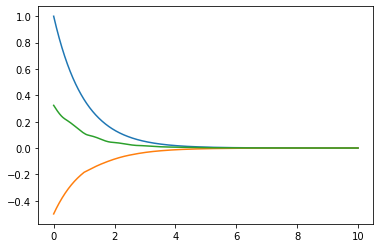

In [132]:
fig, axe = plt.subplots()
axe.plot(t, model(t))
axe.plot(t, dy(t))
axe.plot(t, d2y(t))